In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import spotipy
import os
%matplotlib inline
import warnings
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from pandas import Series
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Read Dataset from CSV Files - Tracks & Artists

In [4]:
tracks_data = pd.read_csv('/Users/pranavpadhiyar/Desktop/GBC/Applied_AI/April/Full_Stack/Project/data/tracks.csv')

## 1. EDA

In [5]:
print(tracks_data.shape)
tracks_data.head(10)

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [6]:
tracks_data['year'] = tracks_data['release_date'].str[:4]

In [7]:
tracks_data['year'] = tracks_data['year'].astype('int64')

In [8]:
# Create a function to map tempo to class
def map_tempo_to_class(tempo):
    if tempo <= 90:
        return 'class1'
    elif tempo <= 130:
        return 'class2'
    else:
        return 'class3'



In [9]:
# Apply the function to the 'tempo' column and create a new column 'tempo_class'
tracks_data['tempo_class'] = tracks_data['tempo'].apply(lambda x: map_tempo_to_class(x))

In [10]:
tracks_data['tempo_class']

0         class2
1         class2
2         class3
3         class3
4         class2
           ...  
586667    class3
586668    class3
586669    class3
586670    class2
586671    class2
Name: tempo_class, Length: 586672, dtype: object

In [11]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

## 2. Preprocessing

In [13]:
tracks_data.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
year                 0
tempo_class          0
dtype: int64

In [14]:
tracks_data.dropna(inplace=True)

All good with Genre Data dataframe as seen below

In [16]:
tracks_data = tracks_data.drop_duplicates(subset=['name', 'artists'])

Let's check for correlation of features

### Pearson Correlation

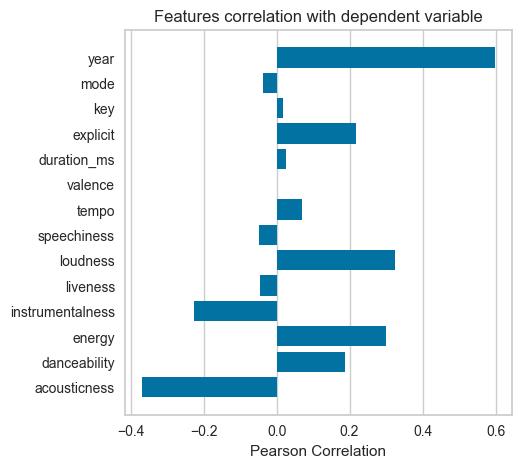

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [20]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = tracks_data[feature_names], tracks_data['popularity']

# Convert non-numeric values to NaN and then convert to float
X = X.apply(pd.to_numeric, errors='coerce').astype('float64')
y = pd.to_numeric(y, errors='coerce').astype('float64')

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(5,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

As we can see, loudness greatly correlates with energy/accousticness and accousticness correlates with energy.

### Clustering Algorithms
Clustering is the process of grouping observations of similar kinds into smaller groups within the larger population. It has a widespread application in business analytics. One of the questions facing businesses is how to organize the huge amounts of available data into meaningful structures.

We will be trying out various clustering algorithms to fit out data into groups of cluster which will then be used by our ML model in the recommender system.

we tried 4 different clustering techniques:

- Kmeans
- BIRCH
- C means
- Gausian Mixture

In [21]:
df = tracks_data.select_dtypes(np.number)
number_cols = list(df.columns)

### Standard Scaler
Before Clustering our data we need to scale down the features to to a given range so that the clustering algorithm dosen't favour a particular feature just because it has a greater value

we will be using Standard Scaler from the sci-kit learn library to scale down our data.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df.values)

scaled_df = pd.DataFrame(scaled_X,
columns=df.columns)

### PCA
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scaled_df)

pca_df = pca.transform(scaled_df)

In [24]:
from sklearn import metrics
dict1 = {}

### 1. Kmeans Clustering
K-Means clustering is an unsupervised learning algorithm, which is used when you have unlabeled data. The aim of this algorithm is to find groups in the data. K-means clustering algorithm has many uses for grouping text documents, images, videos, and much more. It works iteratively to assign each data point to one of the groups based on the Euclidean distance.

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, verbose=2)
kmeans.fit(pca_df)

/Users/pranavpadhiyar/miniforge3/envs/tf_gpu_2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 456052.64166253235.
Iteration 1, inertia 390832.30360813707.
Iteration 2, inertia 384823.7855642702.
Iteration 3, inertia 381916.5121574792.
Iteration 4, inertia 379697.50257940125.
Iteration 5, inertia 377517.00952362246.
Iteration 6, inertia 375364.9923784788.
Iteration 7, inertia 373271.2987729931.
Iteration 8, inertia 371369.8250701012.
Iteration 9, inertia 369705.44162216777.
Iteration 10, inertia 368339.1491572894.
Iteration 11, inertia 367221.3529612228.
Iteration 12, inertia 366371.99654664414.
Iteration 13, inertia 365714.41881878464.
Iteration 14, inertia 365226.5970853864.
Iteration 15, inertia 364887.771162636.
Iteration 16, inertia 364636.8216627614.
Iteration 17, inertia 364429.5362551388.
Iteration 18, inertia 364268.30342026113.
Iteration 19, inertia 364149.8556021212.
Iteration 20, inertia 364057.31640687294.
Iteration 21, inertia 363985.4134901074.
Iteration 22, inertia 363927.0723941114.
Iteration 23, inertia 363879.727434

KMeans(n_clusters=10, verbose=2)

In [26]:
spotify_dataKmeans = tracks_data.copy()
spotify_dataKmeans['cluster_label'] = kmeans.predict(pca_df)

In [27]:
x = metrics.calinski_harabasz_score(pca_df, spotify_dataKmeans['cluster_label'])
print(x)
#kmeans
dict1['kmeans']=x

384120.22572595644


### 2. BIRCH Clustering
It is a memory-efficient, online-learning algorithm provided. It constructs a tree data structure with the cluster centroids being read off the leaf. These can be either the final cluster centroids or can be provided as input to another clustering algorithm such as AgglomerativeClustering.

In [28]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=10)
brc.fit(pca_df)

Birch(n_clusters=10)

In [29]:
spotify_dataBirch = tracks_data.copy()
spotify_dataBirch['cluster_label'] = brc.predict(pca_df)

In [30]:
x = metrics.calinski_harabasz_score(pca_df, spotify_dataBirch['cluster_label'])
print(x) #BIRCH
dict1['BIRCH']=x

96518.12448719343


### 3. Fuzzy C Mean Clustering
Fuzzy C mean works by assigning membership to each data point corresponding to each cluster center on the basis of distance between the cluster center and the data point. More the data is near to the cluster center more is its membership towards the particular cluster center.

In [31]:
pip install fuzzy-c-means --quiet

Note: you may need to restart the kernel to use updated packages.


In [32]:
from fcmeans import FCM

In [33]:
fcm = FCM(n_clusters=10)
fcm.fit(pca_df)

In [34]:
spotify_dataFuzzy = tracks_data.copy()
spotify_dataFuzzy['cluster_label'] = fcm.predict(pca_df)

In [35]:
x=metrics.calinski_harabasz_score(pca_df, spotify_dataFuzzy['cluster_label'])
print(x) #fuzzy c mean
dict1['fuzzy c']=x

370231.2225564328


### 4. Gausian Mixture Model
Gaussian Mixture Model or Mixture of Gaussian as it is sometimes called, is not so much a model as it is a probability distribution. It is a universally used model for generative unsupervised learning or clustering. It is also called Expectation-Maximization Clustering or EM Clustering and is based on the optimization strategy.

In [36]:
from sklearn.mixture import GaussianMixture

In [37]:
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(pca_df)

GaussianMixture(n_components=7, random_state=23)

In [38]:
spotify_gm = tracks_data.copy()
spotify_gm['cluster_label'] = gm.predict(pca_df)

In [39]:
x=metrics.calinski_harabasz_score(pca_df, spotify_gm['cluster_label'])
print(x)
#Gausian Mixture
dict1['Gausian Mixture']=x

389237.3791974227


#### Accuracy for these Clustering Algorithms

We will be using the Calinski Harabasz score from sklearn.metrics

Calinski-Harabasz (CH) Index (introduced by Calinski and Harabasz in 1974) can be used to evaluate the model when ground truth labels are not known where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. The CH Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

The Higher the score the Better the Result.

In [40]:
m = pd.DataFrame(list(dict1.items()),columns = ['cluster','score'])

In [41]:
m.set_index('cluster',inplace=True)
m

,score
cluster,
kmeans,384120.225726
BIRCH,96518.124487
fuzzy c,370231.222556
Gausian Mixture,389237.379197


In [42]:
fig = px.bar(m, orientation='h')
fig.show()

As we see above, kmeans is the best compared to **fuzzy c** & **Gaussian Mixture** with a score of **458.981k** 

Hence, we will go ahead with kmeans

### Final Conclusion --> Clustering Songs with KMeans

In [43]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = tracks_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
tracks_data['cluster_label'] = song_cluster_labels

/Users/pranavpadhiyar/miniforge3/envs/tf_gpu_2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
tracks_data['cluster_label'].shape

(526609,)

In [45]:
tracks_data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,tempo_class,cluster_label
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922,class2,1
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922,class2,9
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922,class3,12
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922,class3,19
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922,class2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020,class3,14
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020,class3,10
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020,class3,5
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021,class2,8


## Commenting the code below because it increases the file size to more than 100mb

In [1]:
# # Visualizing the Clusters with PCA

# from sklearn.decomposition import PCA

# pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
# song_embedding = pca_pipeline.fit_transform(X)
# projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
# projection['title'] = tracks_data['name']
# projection['cluster'] = tracks_data['cluster_label']

# fig = px.scatter(
#     projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
# fig.show()

In [47]:
tracks_data = tracks_data.drop_duplicates(subset=['name', 'artists'])

# Building Recommender System

In [48]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526609 entries, 0 to 586671
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526609 non-null  object 
 1   name              526609 non-null  object 
 2   popularity        526609 non-null  int64  
 3   duration_ms       526609 non-null  int64  
 4   explicit          526609 non-null  int64  
 5   artists           526609 non-null  object 
 6   id_artists        526609 non-null  object 
 7   release_date      526609 non-null  object 
 8   danceability      526609 non-null  float64
 9   energy            526609 non-null  float64
 10  key               526609 non-null  int64  
 11  loudness          526609 non-null  float64
 12  mode              526609 non-null  int64  
 13  speechiness       526609 non-null  float64
 14  acousticness      526609 non-null  float64
 15  instrumentalness  526609 non-null  float64
 16  liveness          52

In [49]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [81]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

import pandas as pd
from scipy.spatial.distance import cdist, euclidean, cityblock, cosine, jaccard
import numpy as np

number_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year']

def get_mean_vector(song_list):
    
    song_vectors = []
    
    print(song_list[0])

    for song in song_list:
        song_vector = np.empty((0,))

        for col in number_cols:
            song_vector = np.append(song_vector, song[col]) 
        # song_vector = song[number_cols].values
        print(type(song_vector))
        song_vectors.append(song_vector)  
    
    print(type(song_vectors))
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def check_explicit(Song_df, show_explicit=False):
    if show_explicit == False:
        explicit_songs = Song_df[Song_df['explicit'] == False]
        return explicit_songs
    elif show_explicit == True:
        return Song_df    

def release_year_filter_fun(songs_list, start_year=1920, end_year=2020):
    
    filter_condition = (songs_list['year'] >= start_year) & (songs_list['year'] <= end_year)
    if filter_condition.any():
        filtered_songs = songs_list[filter_condition]
        return pd.DataFrame(filtered_songs)
    else:
        return pd.DataFrame(columns=songs_list.columns)          
    

def tempo_class_filter(songs_list, tempo_value = None):
    
    if tempo_value == 0:
        filtered_tempo = songs_list[songs_list['tempo_class'] == 'class1']

    elif tempo_value == 1:
        filtered_tempo = songs_list[songs_list['tempo_class'] == 'class2']
    else:
        filtered_tempo = songs_list[songs_list['tempo_class'] == 'class3']
        
    return filtered_tempo

def recommend_songs(song_list, spotify_data, distance_types=['cosine', 'euclidean', 'cityblock','jaccard'], n_songs=25000, explicit_filter=None, release_year_filter=None, tempo_filter = None):
    
    metadata_cols = ['name', 'year', 'artists','explicit','tempo','tempo_class','id'] # To-do
    
    song_center = get_mean_vector(song_list)
    print("song_center",song_center)
    scaler = song_cluster_pipeline.steps[0][1] #To Do: Standard Scaler()
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    
    kmeans = song_cluster_pipeline.steps[1][1]
    cluster_labels = kmeans.predict(scaled_data)
    
    # Add the cluster labels as a new column to the spotify_data DataFrame
    spotify_data['cluster_label'] = cluster_labels
    
    distances = []
    for distance_type in distance_types:
        dist_mat = cdist(scaled_song_center, scaled_data, distance_type)
        distances.append(dist_mat)
        
    ensemble_distances = np.mean(np.stack(distances), axis=0)

    
    index = list(np.argsort(ensemble_distances)[:, :n_songs][0])
    rec_songs = spotify_data.iloc[index]
    song_list_df = pd.DataFrame(song_list) # Convert song_list to a DataFrame
    rec_songs = rec_songs[~rec_songs['id'].isin(song_list_df['id'])] # Use song_list_df instead of song_list
    recommended_songs = rec_songs[metadata_cols].to_dict(orient='records')
    Song_df = pd.DataFrame(recommended_songs)

    
    
    
    
    
    filtered_songs = Song_df
    
    
    
    if explicit_filter is not None:
        filtered_songs = check_explicit(Song_df, explicit_filter)
    
    
    if release_year_filter is not None:
        filtered_songs = release_year_filter_fun(filtered_songs, release_year_filter['start_year'],release_year_filter['end_year'])
            
    if tempo_filter is not None:
        filtered_songs = tempo_class_filter(filtered_songs, tempo_filter)
    
    
    return filtered_songs[:10] # To-do: List of IDs

In [82]:
!pip install scipy

In [83]:
input = {
    'songs': [
        {
            "acousticness": 0.305,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/6VbmeIWTbNHM5uqoW7GTE4",
            "danceability": 0.803,
            "duration_ms": 281707,
            "energy": 0.859,
            "explicit": 0,
            "id": "6VbmeIWTbNHM5uqoW7GTE4",
            "instrumentalness": 0.0000618,
            "key": 6,
            "liveness": 0.553,
            "loudness": -4.405,
            "mode": 0,
            "popularity": 66,
            "speechiness": 0.185,
            "tempo": 101.007,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/6VbmeIWTbNHM5uqoW7GTE4",
            "type": "audio_features",
            "uri": "spotify:track:6VbmeIWTbNHM5uqoW7GTE4",
            "valence": 0.631,
            "year": 2010
        },
        {
            "acousticness": 0.0696,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/0EH7sgeiFqDa3eS7ieW2zs",
            "danceability": 0.742,
            "duration_ms": 227091,
            "energy": 0.879,
            "explicit": 0,
            "id": "0EH7sgeiFqDa3eS7ieW2zs",
            "instrumentalness": 0.00000717,
            "key": 0,
            "liveness": 0.0981,
            "loudness": -4.274,
            "mode": 0,
            "popularity": 73,
            "speechiness": 0.0328,
            "tempo": 133.946,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/0EH7sgeiFqDa3eS7ieW2zs",
            "type": "audio_features",
            "uri": "spotify:track:0EH7sgeiFqDa3eS7ieW2zs",
            "valence": 0.936,
            "year": 2011
        }, 
        {
            "acousticness": 0.0188,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/5Rn1DPzSzUktbhuNDDJocS",
            "danceability": 0.715,
            "duration_ms": 222133,
            "energy": 0.864,
            "explicit": 0,
            "id": "5Rn1DPzSzUktbhuNDDJocS",
            "instrumentalness": 0,
            "key": 11,
            "liveness": 0.719,
            "loudness": -5.013,
            "mode": 0,
            "popularity": 62,
            "speechiness": 0.0751,
            "tempo": 122.016,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/5Rn1DPzSzUktbhuNDDJocS",
            "type": "audio_features",
            "uri": "spotify:track:5Rn1DPzSzUktbhuNDDJocS",
            "valence": 0.57,
            "year": 2012
        },
        {
            "acousticness": 0.464,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/0MbOLfDcGk8ROHJYXJHu5c",
            "danceability": 0.833,
            "duration_ms": 171273,
            "energy": 0.678,
            "explicit": 1,
            "id": "0MbOLfDcGk8ROHJYXJHu5c",
            "instrumentalness": 0,
            "key": 9,
            "liveness": 0.107,
            "loudness": -3.711,
            "mode": 0,
            "popularity": 73,
            "speechiness": 0.141,
            "tempo": 109.969,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/0MbOLfDcGk8ROHJYXJHu5c",
            "type": "audio_features",
            "uri": "spotify:track:0MbOLfDcGk8ROHJYXJHu5c",
            "valence": 0.576,
            "year": 2023
        },
        {
            "acousticness": 0.166,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/1NxlktIRgiAPJ8U06v9veI",
            "danceability": 0.833,
            "duration_ms": 223992,
            "energy": 0.74,
            "explicit": 0,
            "id": "1NxlktIRgiAPJ8U06v9veI",
            "instrumentalness": 0.00000274,
            "key": 6,
            "liveness": 0.363,
            "loudness": -4.513,
            "mode": 0,
            "popularity": 57,
            "speechiness": 0.129,
            "tempo": 103.035,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/1NxlktIRgiAPJ8U06v9veI",
            "type": "audio_features",
            "uri": "spotify:track:1NxlktIRgiAPJ8U06v9veI",
            "valence": 0.804,
            "year": 2014
        }
    ],
    'explicit': 0, # 0 / 1
    'release_year': {
        'start_year': 1980,
        'end_year': 2010
    },
    'tempo': 2, # 0, 1, 2
}

In [84]:
song_list = input['songs']
explicit_filter = input['explicit']
release_year_filter = input['release_year']
tempo_filter = input['tempo']

In [85]:
Songs_list = recommend_songs(song_list,tracks_data,explicit_filter=explicit_filter, release_year_filter=release_year_filter, tempo_filter=tempo_filter)

{'acousticness': 0.305, 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6VbmeIWTbNHM5uqoW7GTE4', 'danceability': 0.803, 'duration_ms': 281707, 'energy': 0.859, 'explicit': 0, 'id': '6VbmeIWTbNHM5uqoW7GTE4', 'instrumentalness': 6.18e-05, 'key': 6, 'liveness': 0.553, 'loudness': -4.405, 'mode': 0, 'popularity': 66, 'speechiness': 0.185, 'tempo': 101.007, 'time_signature': 4, 'track_href': 'https://api.spotify.com/v1/tracks/6VbmeIWTbNHM5uqoW7GTE4', 'type': 'audio_features', 'uri': 'spotify:track:6VbmeIWTbNHM5uqoW7GTE4', 'valence': 0.631, 'year': 2010}
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
song_center [ 6.620000e+01  2.252392e+05  2.000000e-01  7.852000e-01  8.040000e-01
  6.400000e+00 -4.383200e+00  0.000000e+00  1.125800e-01  2.046800e-01
  1.434200e-05  3.680200e-01  7.034000e-01  1.139946e+02  4.000000e+00
  2.014000e+03]


/Users/pranavpadhiyar/miniforge3/envs/tf_gpu_2/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [86]:
Songs_list

,name,year,artists,explicit,tempo,tempo_class,id
40,Right Now (Na Na Na),2008,['Akon'],0,137.982,class3,2VqAEP1yY5T523K7bZtL8a
116,Bu Gece,2006,['Gülşen'],0,130.015,class3,7LGhzpvEpVotkF8JuX3aU6
169,Vieni A Ballare In Puglia,2008,['Caparezza'],0,140.033,class3,7IBGw13AbUorsu133u6Q0Z
171,Bagsakan,2005,"['Parokya Ni Edgar', 'Francis M.', 'Gloc 9', '...",0,135.005,class3,6379OM1UeWonOckjr8ikLh
196,Der letzte Tag,2008,['Peter Fox'],0,144.874,class3,4tlqa6eVIj0HzjlrASAcpu
268,Everybody in Love,2009,['JLS'],0,139.975,class3,2iLN22AngD3PTsbvBu5ypL
288,Let's Get Loud,1999,['Jennifer Lopez'],0,130.993,class3,42nSaPdT6g3ZIMHmKLlP2p
322,Turn Around - Radio Edit,1999,"['Phats & Small', 'Toney Lee']",0,131.932,class3,2nx86MrPkXWQctveAEFJBf
340,Ni Una Sola Palabra,2006,['Paulina Rubio'],0,130.097,class3,1JLB67iNVIOs6NCiMAB1Fo
365,No Moriré,2010,"['Héctor Acosta ""El Torito""']",0,130.140,class3,0JVtj37cJp8ddev6OJtQW5
